### Objectives of this notebook:
- display output from Training Image Modelling
- perform analysis on output. eg. feature importance and Training Image selection
- in console do: jupyter nbconvert --to="python" '.\Postprocessing.ipynb'
- this will upload the file in pure python format

In [1]:
import numpy as np
import pandas as pd
import plotly.io as pio
import sys
import random 
import datetime
import pathlib

sys.path.append("../")
from training_images.TI_selection import TI_selection
pio.renderers.default = "browser"


### Import data

In [2]:
dataset = "2020_12_14_12_25" #2020_11_20_16_03 2020_11_28_12_34
dataset = "case_in_use"
TI_data = TI_selection(dataset = dataset, n_shedules = 2,TI_name = "TI_crest")

In [3]:
pio.renderers.default = "browser"
TI_data.plot_TI_performance()

In [4]:
TI_data.df_TI_props

TI_no      P32  P32_random  P32_area_specific  n_fracsets_random  \
0        0  0.04398     0.01891            0.02507                3.0   
1        1  0.06348     0.01460            0.04888                4.0   
2        2  0.04482     0.02331            0.02151                3.0   
3        3  0.07089     0.04041            0.03048                2.0   
4        4  0.04345     0.01434            0.02911                2.0   
..     ...      ...         ...                ...                ...   
595    595  0.03095     0.01269            0.01826                3.0   
596    596  0.02681     0.01609            0.01072                1.0   
597    597  0.04313     0.01768            0.02545                4.0   
598    598  0.02451     0.00662            0.01789                2.0   
599    599  0.05044     0.03379            0.01665                2.0   

     n_fracsets_area_specific  seed_random_0  P32_random_0  \
0                         3.0        69895.7      0.006303   
1                         1.0        53764.3      0.003650   
2                         2.0        14040.8      0.007770   
3                         1.0        87420.0      0.020205   
4                         2.0         6535.6      0.007170   
..                        ...            ...           ...   
595                       1.0        76843.1      0.004230   
596                       2.0        32922.8      0.016090   
597                       2.0        76712.4      0.004420   
598                       3.0        38703.7      0.003310   
599                       3.0        69796.0      0.016895   

     frac_length_shape_random_0  frac_length_scale_random_0  ...  \
0                          2.29                       11.06  ...   
1                          2.39                       11.20  ...   
2                          2.38                        8.02  ...   
3                          2.30                       12.39  ...   
4                          2.16                       16.08  ...   
..                          ...                         ...  ...   
595                        2.19                        5.92  ...   
596                        2.42                       15.68  ...   
597                        2.43                        9.04  ...   
598                        2.35                        6.87  ...   
599                        2.48                       10.47  ...   

     frac_length_max_area_specific_3  frac_orient_dip_area_specific_3  \
0                             154.04                            85.25   
1                             300.04                            89.67   
2                             204.01                            85.14   
3                             293.76                            89.92   
4                              61.54                            88.31   
..                               ...                              ...   
595                           101.78                            88.28   
596                           283.41                            87.98   
597                           278.38                            89.84   
598                           209.27                            86.97   
599                           159.67                            89.44   

     frac_orient_azimuth_area_specific_3  \
0                                 266.42   
1                                 252.44   
2                                 257.52   
3                                 254.25   
4                                 247.40   
..                                   ...   
595                               258.08   
596                               253.59   
597                               249.23   
598                               249.91   
599                               260.77   

     frac_orient_concentration_area_specific_3  mean_permx  mean_permy  \
0                                        26.40     84.2014    208.1700   
1           

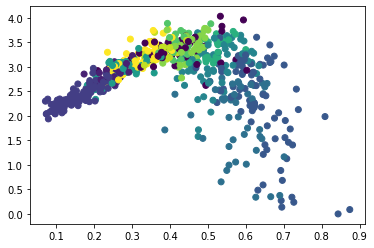

In [256]:
import matplotlib.pyplot as plt
plt.scatter(TI_data.df_TI_props.frac_cell_fraction,TI_data.df_TI_props.tof_entropy_1,c = TI_data.df_TI_props.cluster_tof
)

In [7]:
TI_data.plot_best_model(TI_id = 397, random_TI = False, property ="PERMX",n_bins = 4,min_tof_bin = 0,max_tof_bin =20,shedule_no = 0)

Plotting Training Image 397
[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 28800
     NumOfCells 3600
     .....Done!
[Output] Writing "GRDECL_file_reader/Results\GRID.vtu" Paraview file....Done!
[Output] Writing "GRDECL_file_reader/Results\GRID.vtu" Paraview file....Done!
[Output] Writing "GRDECL_file_reader/Results\GRID.vtp" VTP file..vtp file created.


In [180]:
TI_data.calculate_TI_tof_entropy(shedule_no = 0)
TI_data.calculate_TI_tof_entropy(shedule_no = 1)

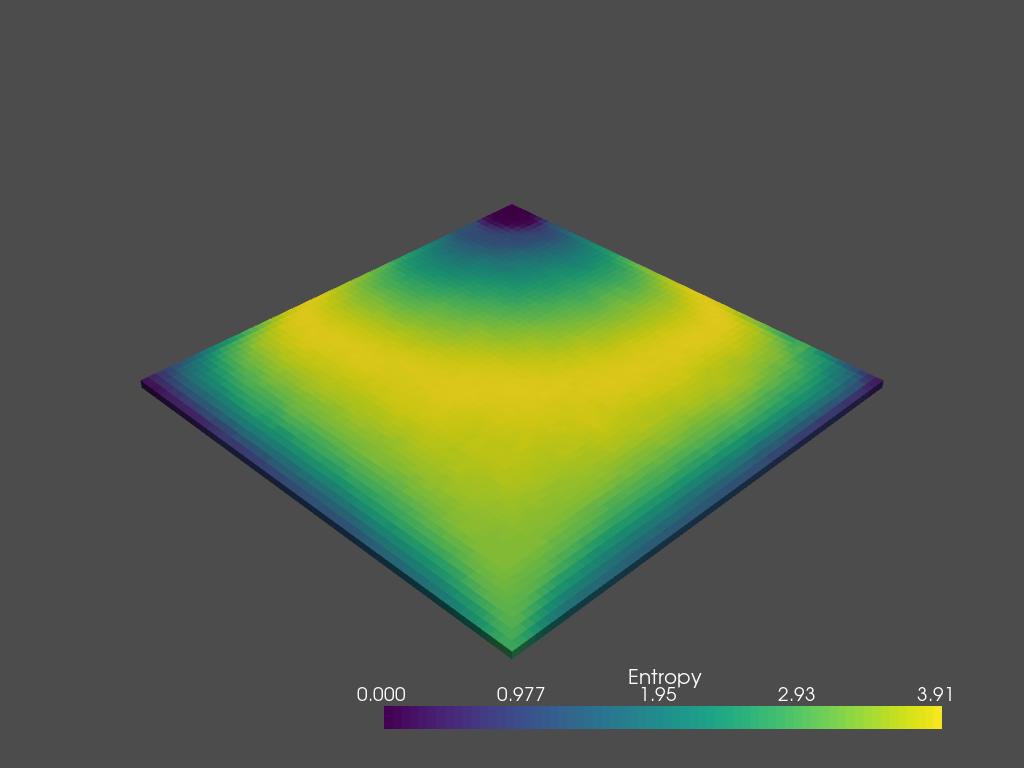

In [181]:
TI_data.plot_tof_entropy(max_tof_bin = 15,n_bins = 15,shedule_no = 0)

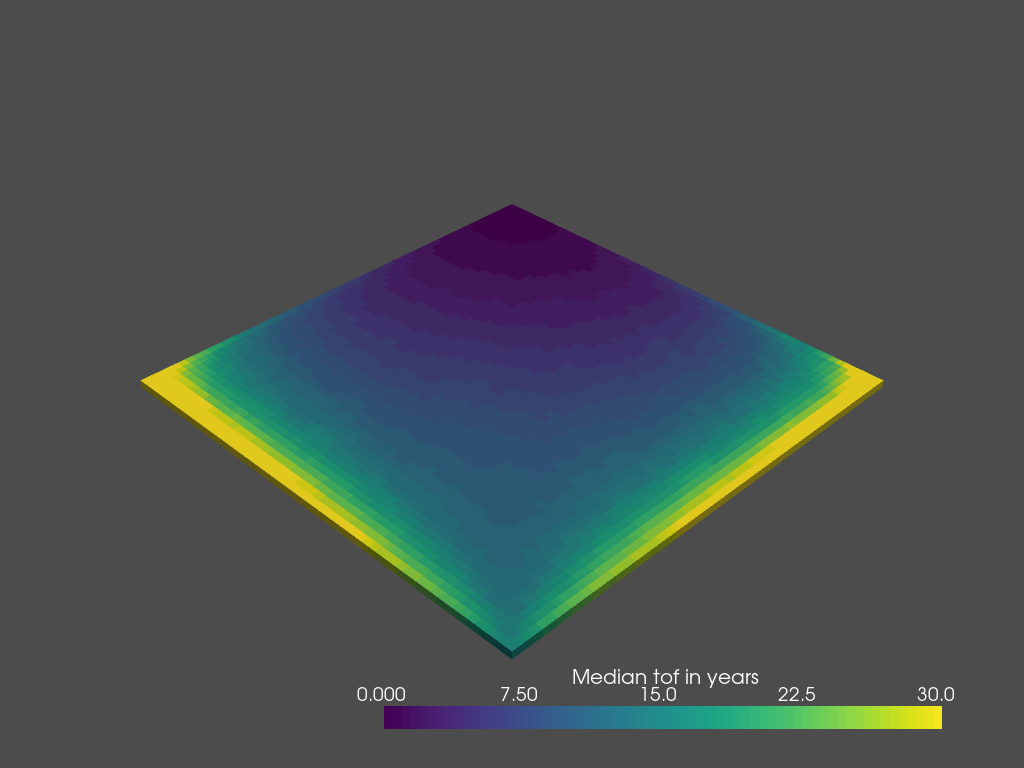

In [182]:
TI_data.plot_tof_all_models(n_bins = 30,shedule_no = 0,max_tof_bin = 30)

In [224]:
pio.renderers.default = "notebook"

TI_data.clustering_tof_or_TI_props(n_neighbors = 20,min_dist = 0,n_components = 5, min_cluster_size = 20,
                           min_samples = 1,allow_single_cluster = False,cluster_parameter = "tof",use_tof_entropy = True,min_tof_bin = 0,max_tof_bin = 20, n_bins = 20)



In [228]:
TI_data.cluster_TI_selection(n_TIs= 20)

In [229]:
TI_data.save_best_clustered_TIs()

Path ..\training_images\..\..\Output\training_images\TI_crest\case_in_use\


### Feature importance - model explainability

In [230]:
import shap
from sklearn.ensemble import RandomForestRegressor


In [231]:
TI_data.df_TI_props

TI_no      P32  P32_random  P32_area_specific  n_fracsets_random  \
0        0  0.04398     0.01891            0.02507                3.0   
1        1  0.06348     0.01460            0.04888                4.0   
2        2  0.04482     0.02331            0.02151                3.0   
3        3  0.07089     0.04041            0.03048                2.0   
4        4  0.04345     0.01434            0.02911                2.0   
..     ...      ...         ...                ...                ...   
595    595  0.03095     0.01269            0.01826                3.0   
596    596  0.02681     0.01609            0.01072                1.0   
597    597  0.04313     0.01768            0.02545                4.0   
598    598  0.02451     0.00662            0.01789                2.0   
599    599  0.05044     0.03379            0.01665                2.0   

     n_fracsets_area_specific  seed_random_0  P32_random_0  \
0                         3.0        69895.7      0.006303   
1                         1.0        53764.3      0.003650   
2                         2.0        14040.8      0.007770   
3                         1.0        87420.0      0.020205   
4                         2.0         6535.6      0.007170   
..                        ...            ...           ...   
595                       1.0        76843.1      0.004230   
596                       2.0        32922.8      0.016090   
597                       2.0        76712.4      0.004420   
598                       3.0        38703.7      0.003310   
599                       3.0        69796.0      0.016895   

     frac_length_shape_random_0  frac_length_scale_random_0  ...  mean_permz  \
0                          2.29                       11.06  ...     179.865   
1                          2.39                       11.20  ...     200.615   
2                          2.38                        8.02  ...     128.665   
3                          2.30                       12.39  ...     128.691   
4                          2.16                       16.08  ...     162.170   
..                          ...                         ...  ...         ...   
595                        2.19                        5.92  ...     126.806   
596                        2.42                       15.68  ...     223.805   
597                        2.43                        9.04  ...     120.835   
598                        2.35                        6.87  ...     131.808   
599                        2.48                       10.47  ...     143.534   

     frac_cell_fraction      LC_0      LC_1  tof_entropy_0  tof_entropy_1  \
0              0.341389  0.180523  0.199603       3.148884       3.195763   
1              0.546944  0.253276  0.205698       3.211224       3.030712   
2              0.372778  0.223571  0.209697       3.355842       3.443119   
3              0.495278  0.250142  0.283218       3.315863       3.210742   
4              0.355556  0.254813  0.222911       3.264376       3.125309   
..                  ...       ...       ...            ...            ...   
595            0.264722  0.202106  0.195785       3.033372       2.733857   
596            0.233333  0.198109  0.164942       2.896830       2.819764   
597            0.285556  0.225574  0.217635       2.954848       3.071174   
598            0.248611  0.235649  0.225034       2.889167       3.028152   
599            0.399722  0.188110  0.200065       3.435161       3.392029   

     cluster_tof_prob  cluster_tof  cluster_tof_x  cluster_tof_y  
0            1.000000           10       7.263562       5.175547  
1            0.955981            4       3.125665       4.530412  
2            0.000000           -1       6.567667       5.269227  
3            1.000000            6       3.721903       4.700922  
4            1.000000           10       7.025024       5.178537  
..                ...          ...            ...            ...  
595          1.000000       

In [232]:
X_train = TI_data.df_TI_props.drop(["TI_no","cluster_tof","LC_0","LC_1","cluster_tof_prob","cluster_tof_x","cluster_tof_y","frac_cell_fraction","tof_entropy_0","tof_entropy_1"],axis = 1)
Y_train = TI_data.df_TI_props["cluster_tof"]

In [233]:
# load JS visualization code to notebook
shap.initjs()

In [234]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

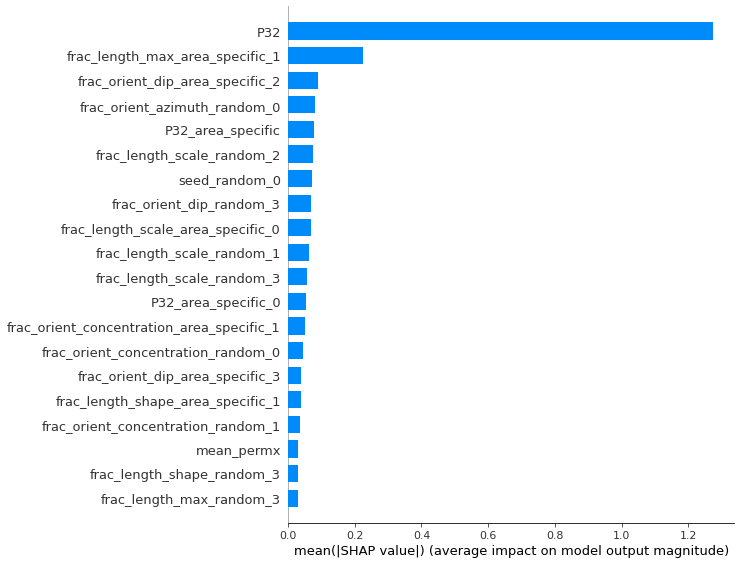

In [235]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [236]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[80,:], X_train.iloc[80,:])

In [237]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

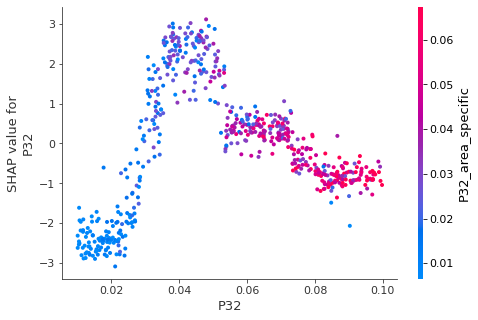

In [238]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("P32", shap_values, X_train)

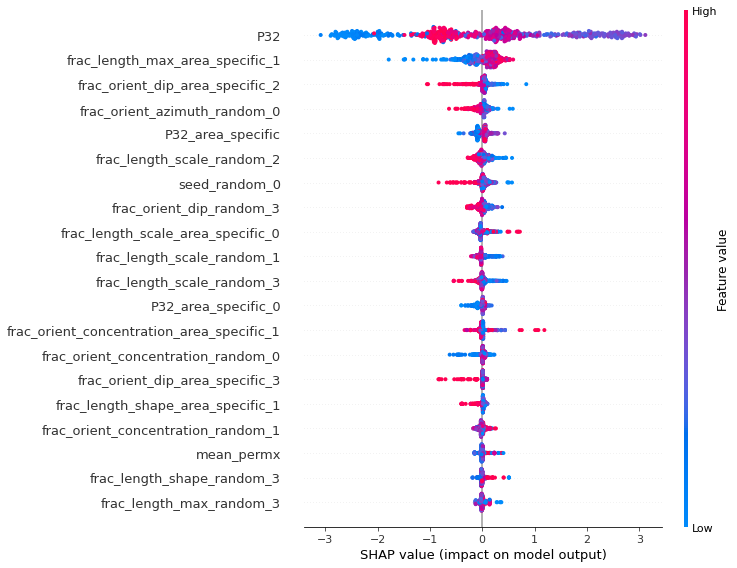

In [239]:
shap.summary_plot(shap_values, X_train)


In [68]:
import numpy as np
from skimage.util.shape import view_as_windows
window_shape = (14,)
Well_Ent1 = np.array([1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2])

 

# create moving window of vector values
moving_window = view_as_windows(Well_Ent1, window_shape )

 

# extract all patterns from moving window
pattern = []
for i in range(moving_window.shape[0]):
#     for j in range (moving_window.shape [1]):
    temp_pattern = list(moving_window [i].flatten ())
    pattern.append(temp_pattern)
        
# find unique patterns and count their occurence 
pattern_unique, pattern_unique_counter = np.unique(pattern, return_counts=True,axis = 0)
pattern_unique_freq = pattern_unique_counter/np.sum(pattern_unique_counter) 
TI_entropy = []
#calculate shannon entropy
ent = 0.0
for freq in pattern_unique_freq:
    ent += freq * np.log2(freq)
ent = -ent
TI_entropy.append(ent)
TI_entropy

[2.321928094887362]

In [59]:
# find unique patterns and count their occurance
pattern_unique, pattern_unique_counter = np.unique(pattern, return_counts=True,axis = 0)
pattern_unique_freq = pattern_unique_counter/np.sum(pattern_unique_counter)

In [60]:
pattern_unique_freq

array([0.30769231, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
       0.07692308, 0.30769231])

In [61]:
moving_window.shape

(13, 6)